# Assessing Portuguese Wine Quality

The below provides an assessment of two datasets related to red and white vinho verde wine samples from the north of Portugal. The goal is to model wine quality based on physicochemical tests

source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

#### First, import the red wine data and assess it.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


url_redwine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(url_redwine, sep=";")
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
print(
    "Number of Red Samples: {}".format(df_red.shape[0]),

    "Number of Columns/Features (Red): {}".format(df_red.shape[1]),

    "Red wine duplicates: {}".format(sum(df_red.duplicated())),
    
    "Red wine unique Quality values: {}".format(df_red['quality'].nunique()),
    
    "Mean density in the red wine: {}".format(df_red['density'].mean()), 
    
    sep='\n')

Number of Red Samples: 1599
Number of Columns/Features (Red): 12
Red wine duplicates: 240
Red wine unique Quality values: 6
Mean density in the red wine: 0.9967466791744833


#### Repeat the previous assessment for the white wine dataset

In [45]:
url_whitewine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(url_whitewine, sep=";")
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [46]:
print(
    "Number of White Samples: {}".format(df_white.shape[0]),
    
    "Number of Columns/Features (White): {}".format(df_white.shape[1]),
    
    "White wine duplicates: {}".format(sum(df_white.duplicated())),
    
    "White wine unique Quality values: {}".format(df_white['quality'].nunique()),
    
    "Mean density in the white wine: {}".format(df_white['density'].mean()), 

    sep='\n')

Number of White Samples: 4898
Number of Columns/Features (White): 12
White wine duplicates: 937
White wine unique Quality values: 7
Mean density in the white wine: 0.9940273764801896


#### Merge the two datasets together

In [74]:
# create color array for red dataframe and add to df_red
color_red = np.repeat('Red',df_red.shape[0])
df_red['color'] = color_red

# create color array for white dataframe and add to df_white
color_white = np.repeat('White',df_white.shape[0])
df_white['color'] = color_white

wine_df = df_red.append(df_white, ignore_index=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


### Histograms for Various Features

Mean: 7.215307064799134
Median: 7.0
Skew: 1.7232896467669239
Std Dev: 1.296433757799792


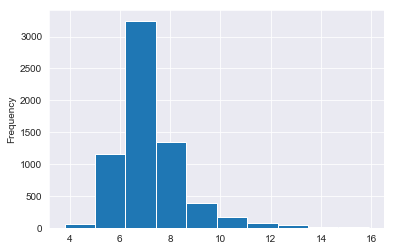

In [126]:
#Fixed Acidity
wine_df['fixed acidity'].plot(kind="hist");
print(
    "Mean: {}".format(wine_df['fixed acidity'].mean()),
    
    "Median: {}".format(wine_df['fixed acidity'].median()),
    
    "Skew: {}".format(wine_df['fixed acidity'].skew()),
    
    "Std Dev: {}".format(wine_df['fixed acidity'].std()),
    
    sep='\n')

Mean: 115.7445744189626
Median: 118.0
Skew: -0.0011774782344379131
Std Dev: 56.521854522630264


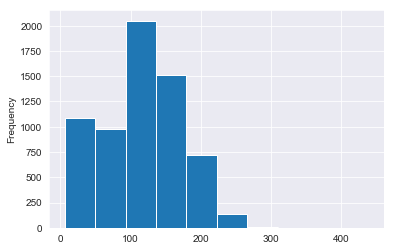

In [127]:
#Total Sulfur Dioxide
wine_df['total sulfur dioxide'].plot(kind='hist');
print(
    "Mean: {}".format(wine_df['total sulfur dioxide'].mean()),
    
    "Median: {}".format(wine_df['total sulfur dioxide'].median()),
    
    "Skew: {}".format(wine_df['total sulfur dioxide'].skew()),
    
    "Std Dev: {}".format(wine_df['total sulfur dioxide'].std()),
    
    sep='\n')

Mean: 3.2185008465445644
Median: 3.21
Skew: 0.38683879806082694
Std Dev: 0.1607872021039883


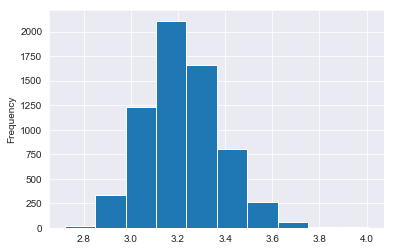

In [128]:
#pH
wine_df.pH.plot(kind='hist');
print(
    "Mean: {}".format(wine_df.pH.mean()),
    
    "Median: {}".format(wine_df.pH.median()),
    
    "Skew: {}".format(wine_df.pH.skew()),
    
    "Std Dev: {}".format(wine_df.pH.std()),
    
    sep='\n')

Mean: 10.491800831152855
Median: 10.3
Skew: 0.565717729098518
Std Dev: 1.192711748870997


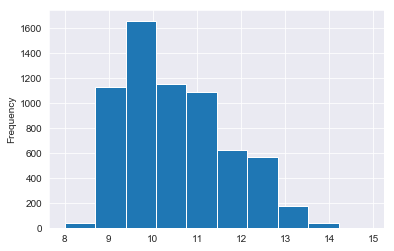

In [129]:
#Alcohol
wine_df.alcohol.plot(kind='hist');
print(
    "Mean: {}".format(wine_df.alcohol.mean()),
    
    "Median: {}".format(wine_df.alcohol.median()),
    
    "Skew: {}".format(wine_df.alcohol.skew()),
    
    "Std Dev: {}".format(wine_df.alcohol.std()),
    
    sep='\n')

It appears that the Fixed Acidity and Alcohol are skewed right since the mean is greater than the median, while Total Sulfur Dioxide is skewed left. pH is the closest to a normal distribution. 

### Scatterplots of Quality Against Various Features

Pearson correlation coefficient


,volatile acidity,quality
volatile acidity,1.000000,-0.265699
quality,-0.265699,1.000000


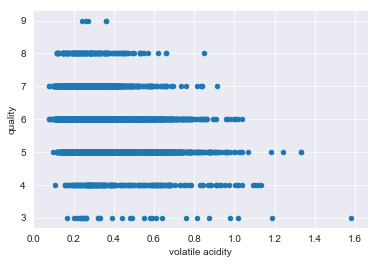

In [130]:
#Volatile Acidity
wine_df.plot(x='volatile acidity', y='quality',kind='scatter');
print("Pearson correlation coefficient")
wine_df.loc[:,["volatile acidity","quality"]].corr(method='pearson')

Pearson correlation coefficient


,residual sugar,quality
residual sugar,1.00000,-0.03698
quality,-0.03698,1.00000


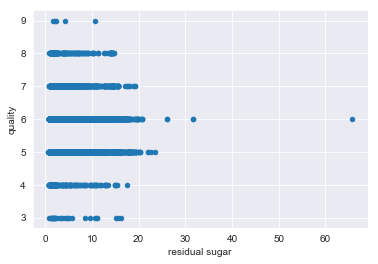

In [131]:
#Residual Sugar
wine_df.plot(x="residual sugar",y="quality",kind="scatter");
print("Pearson correlation coefficient")
wine_df.loc[:,["residual sugar","quality"]].corr(method='pearson')

Pearson correlation coefficient


,pH,quality
pH,1.000000,0.019506
quality,0.019506,1.000000


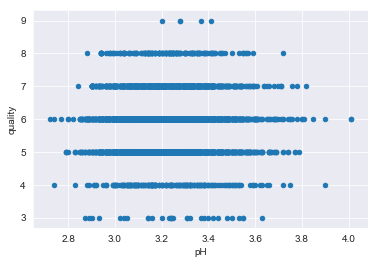

In [132]:
#pH
wine_df.plot(x="pH",y="quality",kind="scatter");
print("Pearson correlation coefficient")
wine_df.loc[:,["pH","quality"]].corr(method='pearson')

Pearson correlation coefficient


,alcohol,quality
alcohol,1.000000,0.444319
quality,0.444319,1.000000


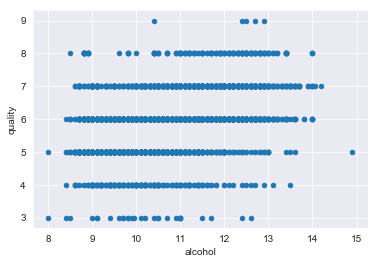

In [133]:
#Alcohol
wine_df.plot(x="alcohol",y="quality",kind="scatter");
print("Pearson correlation coefficient")
wine_df.loc[:,["alcohol","quality"]].corr(method='pearson')

Alcohol appears to have the highest correlation with quality, with a correlation coefficient of 0.44. ph is only slightly positively correlated with quality. Volatile acidity appears to be negatively associated with quality. Residual sugar is only slightly negative in correlation with quality.

### Is a certain type of wine (red or white) associate with higher quality?

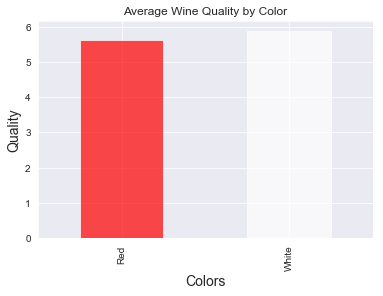

In [146]:
colors = ['red','white']
color_means = wine_df.groupby('color')['quality'].mean()

color_means.plot(kind='bar',title='Average Wine Quality by Color',color=colors,alpha=.7);
plt.xlabel('Colors',fontsize=14);
plt.ylabel('Quality',fontsize=14);


It appears that the average quality of the white wines is higher than that of thre red wines.

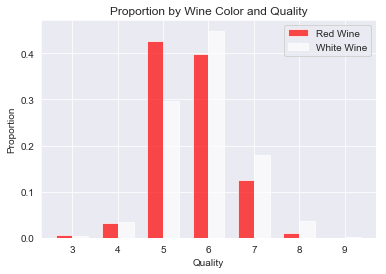

In [153]:
counts = wine_df.groupby(['color', 'quality']).count()['pH']
totals = wine_df.groupby('color').count()['pH']

red_proportions = counts['Red'] / totals['Red']
red_proportions['9'] = 0

white_proportions = counts['White'] / totals['White']

ind = np.arange(len(red_proportions))
width = 0.35

red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7,label='Red Wine')
white_bars = plt.bar(ind+width, white_proportions, width, color='w', alpha=.7,label='White Wine')

plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2 #xtick locations
labels = ['3','4','5','6','7','8','9']
plt.xticks(locations,labels)
plt.legend();

### What level of acidity (pH value) receives the highest average rating?

In [137]:
# Bin edges that will be used to "cut" the data into groups
quart = wine_df['pH'].quantile(.25)
half = wine_df['pH'].quantile(.5)
threequart = wine_df['pH'].quantile(.75)
bin_edges = [wine_df['pH'].min(),quart,half,threequart,wine_df['pH'].max()]

In [138]:
# Labels for the four acidity level groups
bin_names = ['High','Moderately High','Medium','Low' ]

In [139]:
# Creates acidity_levels column
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

Mean quality
acidity levels
High               5.783343
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64


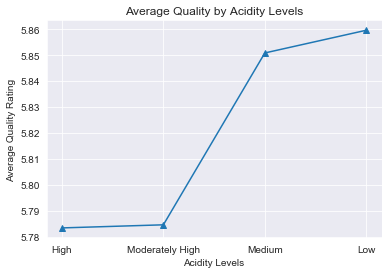

In [140]:
acid_mean = wine_df.groupby('acidity levels')['quality'].mean()

high_mean = acid_mean['High']
modhigh_mean = acid_mean['Moderately High']
med_mean = acid_mean['Medium']
low_mean = acid_mean['Low']

locations = [1,2,3,4]
heights = [high_mean, modhigh_mean, med_mean, low_mean]
labels = ["High", "Moderately High", "Medium", "Low"]
#plt.bar(locations, heights, tick_label=labels)
plt.plot(labels,heights,'-^')
plt.title('Average Quality by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

print(
    "Mean quality",
    
    acid_mean,
    
    sep='\n')

On average, the lower the acidity level, the higher the quality rating. However, the average quality of low and medium acidic wines are almost identical. This is also true with High and Moderately High acidic wines.

### Do wines with higher alcoholic content receive better ratings?

In [141]:
med_alc = wine_df['alcohol'].median()

low_alcohol = wine_df[wine_df['alcohol'] < med_alc]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df['alcohol'] >= med_alc]

mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

Average Quality
High Alcohol: 6.146084337349397
Low Alcohol: 5.475920679886686


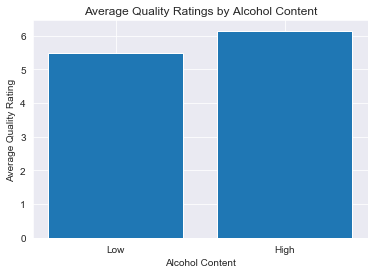

In [142]:
locations = [1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels);
plt.title('Average Quality Ratings by Alcohol Content');
plt.xlabel('Alcohol Content');
plt.ylabel('Average Quality Rating');

print(
    "Average Quality",
    
    "High Alcohol: {}".format(high_alcohol['quality'].mean()),
    
    "Low Alcohol: {}".format(low_alcohol['quality'].mean()),
    
    sep='\n')

### Do sweeter wines receive better ratings?

In [143]:
med_sugar = wine_df['residual sugar'].median()

low_sugar = wine_df[wine_df['residual sugar'] < med_sugar]

high_sugar = wine_df[wine_df['residual sugar'] >= med_sugar]

mean_quality_low = low_sugar['quality'].mean()
mean_quality_high = high_sugar['quality'].mean()

Average Quality
High Sugar: 5.82782874617737
Low Sugar: 5.808800743724822


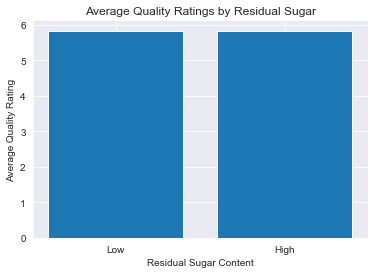

In [144]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');

print(
    "Average Quality",
    
    "High Sugar: {}".format(high_sugar['quality'].mean()),
    
    "Low Sugar: {}".format(low_sugar['quality'].mean()),
    
    sep='\n')